In [77]:
pwd

'/Users/burakcivitcioglu/Documents/doctorat/teaching/molecular_dynamics/notebooks'

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

global num_steps
num_steps = 10000

<h1>Euler's Method</h1>
<p>$$\frac{dx}{dt} = \lim_{h\rightarrow0}\frac{x(t+h)-x(t)}{h}$$</p> 
<p>This is the definition of derivative. In Euler's Method, we will simply make this process discrete. Consider the differential equation:
    $$\frac{dx}{dt} = f(x(t))$$
Then numerically we can have,
    $$ x(t+h) = x(t) + h f(x(t))$$
</p>

<h2>Harmonic Oscillator Example</h2>
<p>The harmonic oscillator is governed by the following equations of motion:
    $$\frac{dx}{dt} = v$$
    $$\frac{dv}{dt} = -kx$$
</p>
<p>Then we will have two equations:
    $$x(t+h) = x(t) + hv(t)$$
    $$v(t+h) = v(t) - hkx(t)$$ 
</p>

In [40]:
def harmonic_oscillator_euler(s=0.02,k=0.5,m=1):
    
    # Let's start by defining our variables in a discrete manner
    t = np.linspace(0, num_steps*s, num_steps+1)
    x = np.zeros(num_steps+1)
    v = np.zeros(num_steps+1)

    # Initial conditions
    x[0] = 1
    v[0] = 0
    
    # The Euler's Method
    for n in np.arange(num_steps):
        x[n+1] = x[n] + s*v[n]
        v[n+1] = v[n] - s*k*x[n]
        
    # Plotting the result and comparing with the exact solution
    fig = plt.figure()
    line_1, line_2 = plt.plot(t, x, 'b-', t, x[0]*np.cos(np.sqrt(k/m)*t), 'r--')
    fig.legend((line_1, line_2), ('numerical', 'exact'), 'upper left')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.show()
    return t,x,v


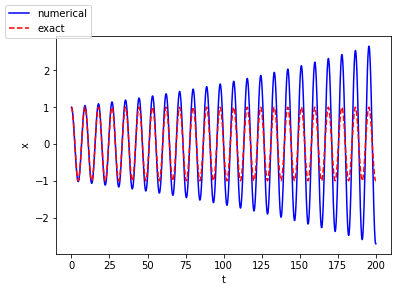

In [41]:
t,x,v = harmonic_oscillator_euler(s=0.02)

Text(0, 0.5, 'p')

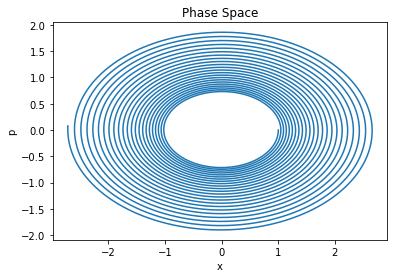

In [42]:
plt.plot(x,v*1) # m = 1
plt.title("Phase Space")
plt.xlabel("x")
plt.ylabel("p")

<h2>Lorenz Model Example</h2>
<p>Lorenz Model is a system described by a set of ODE's as follows:
    $$\frac{dx}{dt} = \sigma (y-x)$$
    $$\frac{dy}{dt} = (p-z)x - y$$
    $$\frac{dz}{dt} = xy - \beta z$$
</p>

In [43]:
def lorenz_model(x, y, z, sigma=10, p=28, beta=2.667):
    x_dot = sigma*(y - x)
    y_dot = (p-z)*x - y
    z_dot = x*y - beta*z
    return x_dot, y_dot, z_dot

In [58]:
def lorenz_model_euler(s=0.01, sigma=10, p=28, beta=2.667):
    # Let's start by defining our variables in a discrete manner

    x = np.empty((num_steps + 1,))
    y = np.empty((num_steps + 1,))
    z = np.empty((num_steps + 1,))
    
    # Setting initial values
    x[0], y[0], z[0] = (0., 1., 1.05)

    # Stepping through "time".
    for i in np.arange(num_steps):
        # Derivatives of the X, Y, Z state
        x_dot, y_dot, z_dot = lorenz_model(x[i], y[i], z[i], sigma, p, beta)
        x[i + 1] = x[i] + (x_dot * s)
        y[i + 1] = y[i] + (y_dot * s)
        z[i + 1] = z[i] + (z_dot * s)
    fig = plt.figure(facecolor='k')
    ax = fig.gca(projection='3d')
    ax.set_facecolor('k')

    ax.plot(x, y, z, lw=0.6)
    ax.set_axis_off()

    plt.show()
    
    plt.plot(z,c="r")
 

    return x,y,z

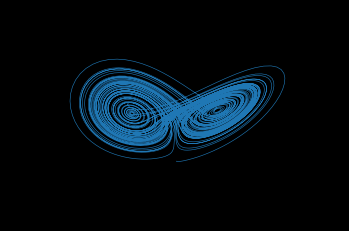

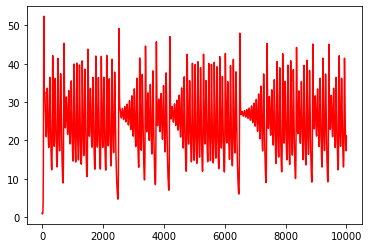

In [59]:
x,y,z = lorenz_model_euler(0.008, sigma=10)

<h1>Heun's Method or Runge-Kutta (RK) 2nd Order</h1>
<p>Consider the differential equation:
    $$\frac{dx}{dt} = f(t,x)$$</p>
<p>In the simple RK Method, we have an update as follows:
    $$x(t+h) = x(t) + hf(t + \frac{h}{2},x(t+\frac{h}{2}))$$
    $$= x(t) + hf(t+\frac{h}{2},x(t)+\dot{x}(t)\frac{h}{2})$$
    $$= x(t) + hf(t+\frac{h}{2},x(t)+\frac{k_1}{2})$$
    $$= x(t) + k_2$$ where $k_1 = h\dot{x}(t)$
</p>
<p>In the end we can have the RK2 Method as:
    $$k_1 =  h\dot{x}(t)$$
    $$k_2 = hf(t+\frac{h}{2},x(t)+\frac{k_1}{2})$$
    $$x(t+h) = x(t) + k_2$$
</p>

<h2>Harmonic Oscillator Example</h2>

<p>The harmonic oscillator is governed by the following equations of motion:
    $$\frac{dx}{dt} = v$$
    $$\frac{dv}{dt} = -kx$$
</p>
<p>Then we will have two set of equations:
    $$x(t+h) = x(t) + k_{21}$$
    $$v(t+h) = v(t) + k_{22}$$ 
</p>
<p>The first one is:
    $$k_{21} = sv(t+\frac{s}{2},x(t)+\frac{k_{11}}{2})$$
    $$k_{11} = sv(t)$$
</p>

<p>The second one is:</p>
<p>
    $$k_{22} = s\dot{v}(t+\frac{s}{2},v(t)+\frac{k_{12}}{2})$$
    $$k_{12} = s\dot{v}(t)$$
</p>

In [8]:
def harmonic_oscillator_RK2(s=0.02,k=0.5,m=1):
    
    # Let's start by defining our variables in a discrete manner
    t = np.linspace(0, num_steps*s, num_steps+1)
    x = np.zeros(num_steps+1)
    v = np.zeros(num_steps+1)

    # Initial conditions
    x[0] = 1
    v[0] = 0
    
    # The RK2 Method
    for n in np.arange(num_steps):
        k_11 = s*v[n]
        k_12 = -s*k*x[n]
        
        k_21 = k_11 + s*x[n]*(s/2)*(-k/m)
        k_22 = k_12/m + v[n]*s*(-k/m)*(s/2)
        
        x[n+1] = x[n] + k_21
        v[n+1] = v[n] + k_22
        
    # Plotting the result and comparing with the exact solution
    fig = plt.figure()
    line_1, line_2 = plt.plot(t, x, 'b-', t, x[0]*np.cos(np.sqrt(k/m)*t), 'r--')
    fig.legend((line_1, line_2), ('numerical', 'exact'), 'upper left')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.show()
    return t,x,v



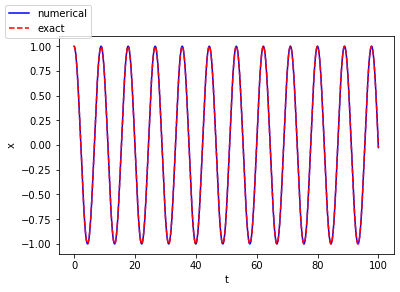

In [76]:
t,x,v = harmonic_oscillator_RK2(s=0.01) # Try s=1

<h2>Lorenz Model Example</h2>

In [73]:
def lorenz_model_RK2(s=0.01, sigma=10, p=28, beta=2.667):
    # Let's start by defining our variables in a discrete manner

    x = np.empty((num_steps + 1,))
    y = np.empty((num_steps + 1,))
    z = np.empty((num_steps + 1,))
    
    # Setting initial values
    x[0], y[0], z[0] = (0., 1., 1.05)

    # Stepping through "time".
    for i in np.arange(num_steps):
        # Derivatives of the X, Y, Z state
        x_dot, y_dot, z_dot = lorenz_model(x[i], y[i], z[i], sigma, p, beta)
        
        k_1x = s*x_dot
        k_1y = s*y_dot
        k_1z = s*z_dot
        
        k_2x, k_2y, k_2z = lorenz_model(x[i]+k_1x/2, y[i]+k_1y/2, z[i]+k_1z/2, sigma,p,beta) 
        
        k_2x = s*k_2x
        k_2y = s*k_2y
        k_2z = s*k_2z
        
        x[i + 1] = x[i] + k_2x
        y[i + 1] = y[i] + k_2y
        z[i + 1] = z[i] + k_2z
        
    fig = plt.figure(facecolor='k')
    ax = fig.gca(projection='3d')
    ax.set_facecolor('k')

    ax.plot(x, y, z, lw=0.6)
    ax.set_axis_off()

    plt.show()
    
    plt.plot(z,c="r")
 

    return x,y,z

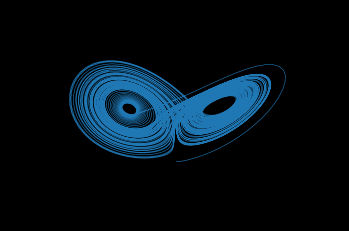

(array([  0.        ,   0.0945    ,   0.18163094, ..., -15.79674001,
        -15.24600816, -14.54148284]),
 array([  1.        ,   1.003532  ,   1.03119274, ..., -11.14231874,
         -8.9604869 ,  -6.84628512]),
 array([ 1.05      ,  1.02286743,  0.99735396, ..., 41.03948412,
        41.50131207, 41.56860252]))

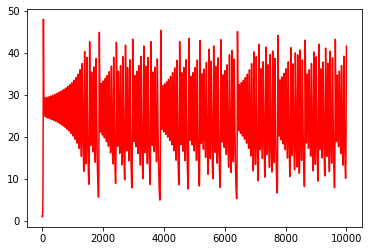

In [74]:
lorenz_model_RK2(s=0.01, sigma=10, p=28, beta=2.667)